In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'white') 
sns.set(style = 'whitegrid', color_codes = True)

import warnings
warnings.simplefilter(action = 'ignore')
from sklearn.model_selection import train_test_split
import sklearn.metrics

## 1) Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [2]:
raw_df = pd.read_csv('E:\Joydeep\AI-ML\GL\Week 6 - Unsupervised Learning\Assignment\/vehicle-1.csv')
raw_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
raw_df.shape

(846, 19)

In [5]:
# Checking for Null Values
raw_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
# Checking for duplicate rows
raw_df.loc[:, raw_df.columns != 'class'].duplicated().sum()

0

In [7]:
# Drop rows with null values

mod_df = raw_df.dropna()
mod_df.shape    

(813, 19)

In [8]:
size = raw_df.groupby('class').size().reset_index(name='Raw')
size['Mod'] = mod_df.groupby('class').size().reset_index(name='Count')['Count']
size

,class,Raw,Mod
0,bus,218,205
1,car,429,413
2,van,199,195


## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [9]:
profile = round(mod_df.describe(),2)
profile.loc['Kurtosis'] = round(mod_df.kurtosis(),2).tolist()
profile.loc['Skew'] = round(mod_df.skew(),2).tolist()

# Outliers = Z-scores > 3
from scipy import stats

for i in mod_df.drop('class', axis = 1).columns:
    mod_df['z'] = np.abs(stats.zscore(mod_df[i]))
    profile.loc['Outliers',i] = len(mod_df[mod_df['z'] > 3].index)
    mod_df.drop('z', axis = 1, inplace = True)

profile.transpose()

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skew,Outliers
compactness,813.0,93.66,8.23,73.0,87.0,93.0,100.0,119.0,-0.51,0.39,1.0
circularity,813.0,44.80,6.15,33.0,40.0,44.0,49.0,59.0,-0.92,0.27,0.0
distance_circularity,813.0,82.04,15.78,40.0,70.0,79.0,98.0,112.0,-0.97,0.11,0.0
radius_ratio,813.0,169.10,33.62,104.0,141.0,167.0,195.0,333.0,0.32,0.40,3.0
pr.axis_aspect_ratio,813.0,61.77,7.97,47.0,57.0,61.0,65.0,138.0,29.57,3.83,8.0
max.length_aspect_ratio,813.0,8.60,4.68,2.0,7.0,8.0,10.0,55.0,56.65,6.70,9.0
scatter_ratio,813.0,168.56,33.08,112.0,146.0,157.0,198.0,265.0,-0.63,0.60,0.0
elongatedness,813.0,40.99,7.80,26.0,33.0,43.0,46.0,61.0,-0.87,0.05,0.0
pr.axis_rectangularity,813.0,20.56,2.57,17.0,19.0,20.0,23.0,29.0,-0.42,0.76,1.0
max.length_rectangularity,813.0,147.89,14.50,118.0,137.0,146.0,159.0,188.0,-0.76,0.27,0.0


#### Inferences 

1. There doesn't seem to be apparent anomalies in the dataset like -ve minimum values
2. Skewness & Outliers are high for pr.axis_aspect_ratio, max.length_aspect_ratio & scaled_radius_of_gyration.1
3. Data has to be scaled to make them comparable in values

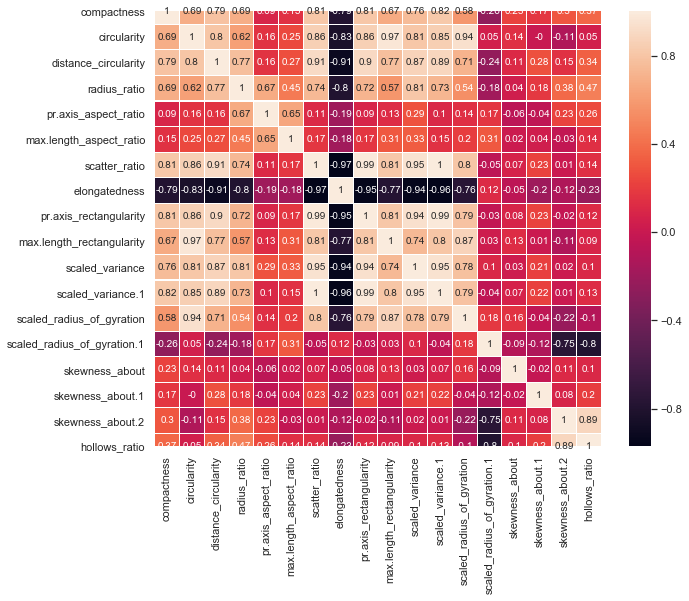

In [10]:
# Checking for correlation between features

plt.figure(figsize = (10,8))
corr = round(mod_df.corr(),2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths = 0.1, linecolor = 'white', annot = True)

Highly correlated features which will be dropped : {'pr.axis_rectangularity', 'scaled_radius_of_gyration', 'scaled_variance', 'scaled_variance.1', 'scatter_ratio', 'max.length_rectangularity', 'elongatedness'}

Pre data set shape : (813, 19)

Post data set shape : (813, 12)



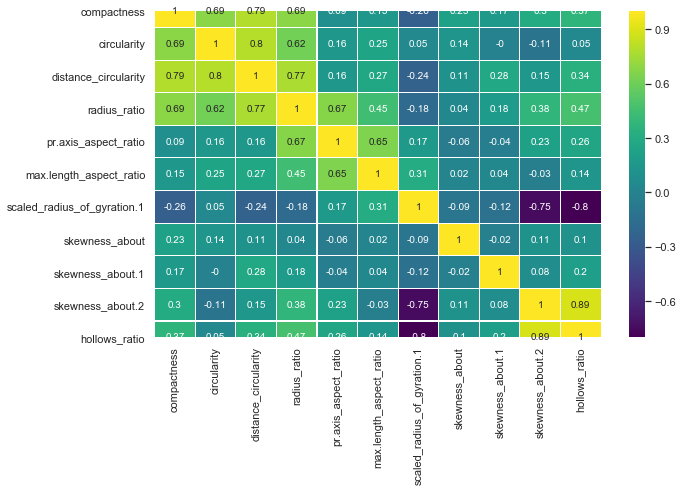

In [11]:
# Removing features with >0.9 correlation

correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            col = corr.columns[i]
            correlated_features.add(col)

print(f'Highly correlated features which will be dropped : {correlated_features}\n')

ncr_df = mod_df.drop(correlated_features, axis = 1)

print(f'Pre data set shape : {mod_df.shape}\n')
print(f'Post data set shape : {ncr_df.shape}\n')


plt.figure(figsize = (10,6))
corr_m = round(ncr_df.corr(),2)
sns.heatmap(corr_m, xticklabels=corr_m.columns, yticklabels=corr_m.columns, linecolor='white',linewidths=0.1, cmap = 'viridis', annot = True)

In [12]:
# Dropping outliers : z-score > 3

ncro_df = ncr_df

for i in ncro_df.drop('class', axis = 1).columns:
    ncro_df['z'] = np.abs(stats.zscore(ncro_df[i]))
    print(i,':', ncro_df[ncro_df['z'] > 3].shape[0])
    ncro_df = ncro_df[ncro_df['z'] <= 3]
    ncro_df.drop('z', axis = 1)

ncro_df.drop('z', axis = 1, inplace = True)
print(f'\nWith outliers data set shape {ncr_df.shape}')
print(f'\nWithout outliers data set shape {ncro_df.shape}')

compactness : 1
circularity : 0
distance_circularity : 0
radius_ratio : 3
pr.axis_aspect_ratio : 5
max.length_aspect_ratio : 4
scaled_radius_of_gyration.1 : 0
skewness_about : 4
skewness_about.1 : 2
skewness_about.2 : 0
hollows_ratio : 0

With outliers data set shape (813, 13)

Without outliers data set shape (794, 12)


In [13]:
# Scaling the data set using Z-Scores

from scipy.stats import zscore

scld_df = ncro_df.drop('class', axis = 1).apply(zscore)
scld_df['class'] = ncro_df['class']
scld_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.161279,0.516163,0.056993,0.311712,1.905205,0.902168,-0.327596,-0.059862,0.381451,-0.323458,0.176131,van
1,-0.327949,-0.617764,0.120282,-0.842639,-0.740975,0.424302,-0.010000,0.565536,0.154920,0.002256,0.447418,van
2,1.262042,0.840143,1.512656,1.278871,0.846733,0.902168,0.148798,1.607864,-0.411408,-0.160601,0.040488,car
3,-0.083335,-0.617764,-0.006297,-0.281063,0.317497,0.424302,-1.439184,-0.059862,-0.298142,1.630829,1.532565,van
6,0.405893,-0.293785,-0.575904,0.155718,0.670321,-1.009297,-0.962789,1.399398,-1.317532,1.793686,1.125635,bus


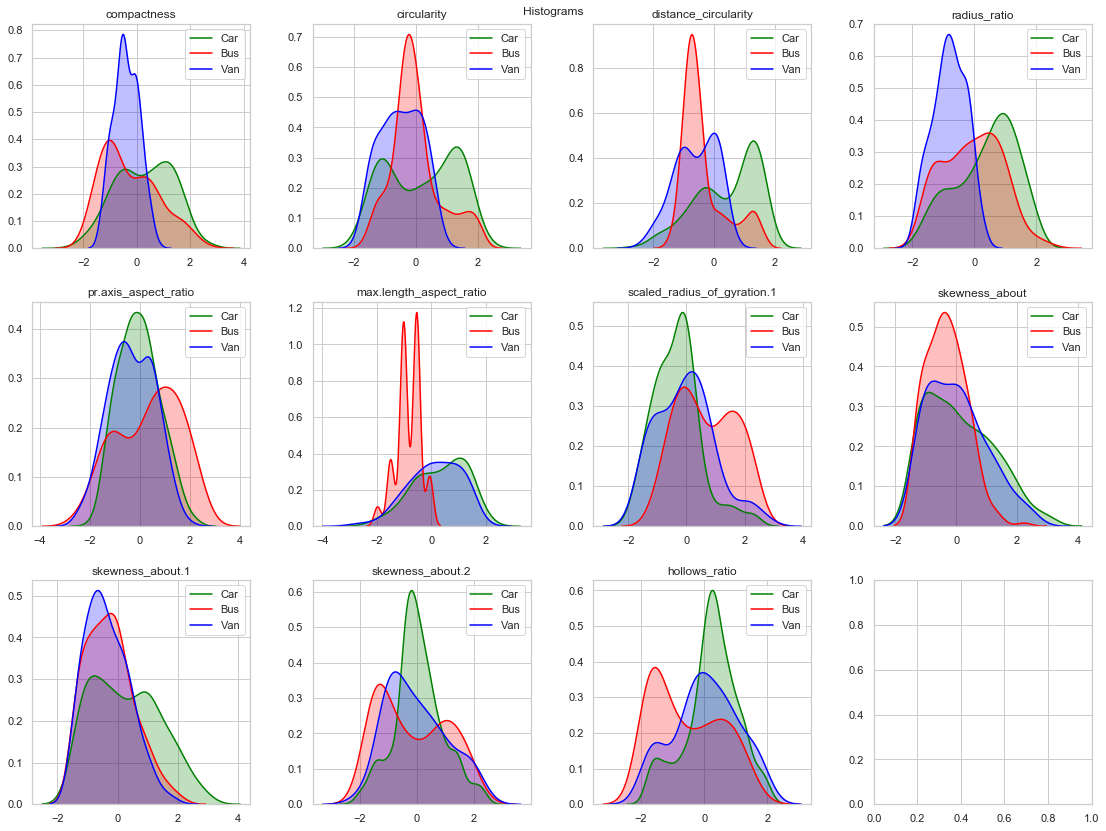

In [14]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, gridspec_kw={'width_ratios':[1,1,1,1]}, figsize=(16,12), sharey = False, sharex = False)
fig.suptitle('Histograms')
fig.tight_layout(pad=3.0)

k = 0

for i in scld_df.drop('class', axis = 1).columns:
    r = k//4
    c = k%4
    ax[r,c].set_title(i, fontsize = 12)
    sns.kdeplot(scld_df[i][scld_df['class'] == 'car'], color = 'Green', label = 'Car', shade = True, ax = ax[r,c])
    sns.kdeplot(scld_df[i][scld_df['class'] == 'bus'], color = 'Red', label = 'Bus', shade = True, ax = ax[r,c])
    sns.kdeplot(scld_df[i][scld_df['class'] == 'van'], color = 'Blue', label = 'Van', shade = True, ax = ax[r,c])
    k = k+1

#### Inferences

1. Compactness : Car is slightly right skewed; Van & Bus are left skewed
2. Circularity : Cars are more evenly distributed with 2 peaks around 0; Bus & vans are slightly left skewed
3. Distance_circularity : Cars are right skewed, Bus & Vans are left skewed
4. Radius_ratio : Vans are mostly left skewed with some outliers on the right, Cars & Buses are right skewed
5. pr.axis_aspect_ratio : Car is almost normally distributed, Bus is left skewed, Van is right skewed slightly
6. max.length_aspect_ratio : Bus is left skewed, Cars and Vans are more evenly spread with slight left skew
7. scaled_radius_of_gyration.1 : Bus is skewed towrds right, Cars & Vans towards left
6. Skewness_about, skewness_about.1 : Slightly left skewed but more homogeneously distributed
7. Skewness_about.2 : Left skewed for Bus & Vans, Cars are almost normally spread around their means
8. hollows_ratio : Left skewed for Bus, equally spread for Vans around its mean with 2 peaks, slight right skew for cars

In [15]:
#Encoding class  

#from sklearn import preprocessing
#encoder = preprocessing.LabelEncoder()

#scld_df['class'] = encoder.fit(scld_df['class'].values)
scld_df['class'].replace(['bus','van','car'],[1,2,3], inplace = True)

print(scld_df['class'].dtype)
scld_df.groupby('class').size().reset_index(name='Counts')

int64


,class,Counts
0,1,200
1,2,188
2,3,406


## 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [16]:
X = scld_df.drop('class', axis = 1)
y = scld_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((555, 11), (239, 11), (555,), (239,))

## 4. Train a Support vector machine using the train set and get the accuracy on the test set

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report

warnings.simplefilter(action = 'ignore')

#Hyperparameter tuning

svm_param = {'C': [0.1,1,5,10], 'gamma': [5,1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

svm = GridSearchCV(SVC(), svm_param, refit=True, cv = 10)
svm.fit(X_train,y_train)
print(f'SVM Best Estimator \n\n {svm.best_estimator_,}\n')

SVM_pred = svm.predict(X_test)
print(classification_report(y_test, SVM_pred)) 

SVM Best Estimator 

 (SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),)

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        60
           2       0.96      0.83      0.89        53
           3       0.95      0.96      0.95       126

    accuracy                           0.93       239
   macro avg       0.93      0.92      0.92       239
weighted avg       0.93      0.93      0.93       239



## 5. Perform K-fold cross validation and get the cross validation score of the model

In [18]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)

results = cross_val_score(svm, X, y, cv = kfold)
print(results)
print(f'Accuracy: {round(results.mean()*100.0,3)}, SD: {round(results.std()*100.0,3)}')

[0.975      0.95       0.9625     0.9625     0.9375     0.9125
 0.94936709 0.92405063 0.96153846 0.96153846]
Accuracy: 94.965, SD: 1.854


## 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

,1,2,3,4,5,6,7,8,9,10,11
Cum Var,0.42486,0.639083,0.740818,0.83772,0.908713,0.957086,0.974229,0.987245,0.993849,0.997226,1.0


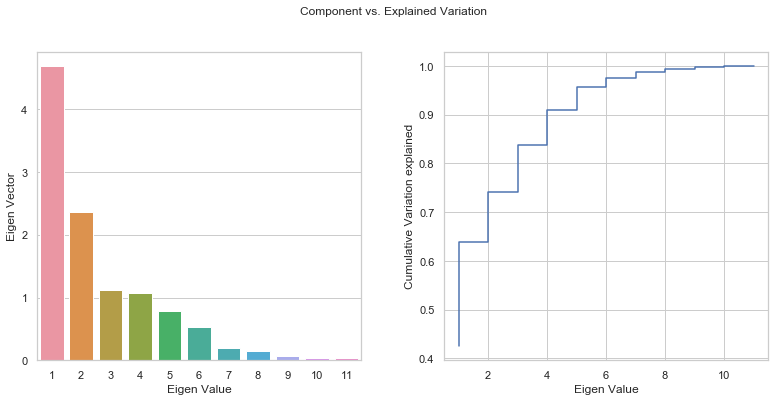

In [19]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 11)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,6))
fig.suptitle('Component vs. Explained Variation')
fig.tight_layout(pad=5.0)

sns.barplot(list(range(1,12)),pca.explained_variance_, ax = ax[0])
sns.lineplot(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre', ax = ax[1])

ax[0].set(xlabel = 'Eigen Value', ylabel = 'Eigen Vector')
ax[1].set(xlabel = 'Eigen Value', ylabel = 'Cumulative Variation explained')

pca_df = pd.DataFrame({'Cum Var':np.cumsum(pca.explained_variance_ratio_)}, index = list(range(1,12)))
pca_df.transpose()

#### 95% of variance in the data is captured by the top 6 components

## 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state)

In [20]:
X_pca6 = X_pca[:,0:6]

XP_train, XP_test, yp_train, yp_test = train_test_split(X_pca6, y, test_size = 0.3, random_state = 2)
XP_train.shape, XP_test.shape, yp_train.shape, yp_test.shape

((555, 6), (239, 6), (555,), (239,))

In [21]:
svm_p = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

svm_p.fit(XP_train,yp_train)

SVM_p_pred = svm_p.predict(XP_test)
print(classification_report(yp_test, SVM_p_pred)) 

              precision    recall  f1-score   support

           1       0.79      0.95      0.86        60
           2       0.76      0.66      0.71        53
           3       0.89      0.86      0.87       126

    accuracy                           0.84       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.84      0.84      0.83       239



## 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

In [22]:
results_p = cross_val_score(svm_p, X_pca6, y, cv = kfold)
print(results_p)
print(f'Accuracy: {round(results_p.mean()*100.0,3)}, SD: {round(results_p.std()*100.0,3)}')

[0.925      0.8375     0.9125     0.8875     0.8875     0.9
 0.89873418 0.79746835 0.96153846 0.85897436]
Accuracy: 88.667, SD: 4.383


#### The mean accuracy (88.67%) & it's standard deviation (4.38%) is worse off on using the principal components than the full data set where we had got 94.96% accuracy with 1.8% standard deviation